<a href="https://colab.research.google.com/github/ClaudiaRocha19/SOLCOMP_Autograd/blob/main/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REGRESION LINEAL CON AUTOGRAD

tensor(5.) tensor(1.)
tensor(214724.1250, grad_fn=<MeanBackward0>)
tensor(3.1261, grad_fn=<MeanBackward0>)
tensor(3.1229, grad_fn=<MeanBackward0>)
tensor(3.1197, grad_fn=<MeanBackward0>)
tensor(3.1165, grad_fn=<MeanBackward0>)
tensor(3.1133, grad_fn=<MeanBackward0>)
tensor(3.1102, grad_fn=<MeanBackward0>)
8.044069290161133 0.13584502041339874


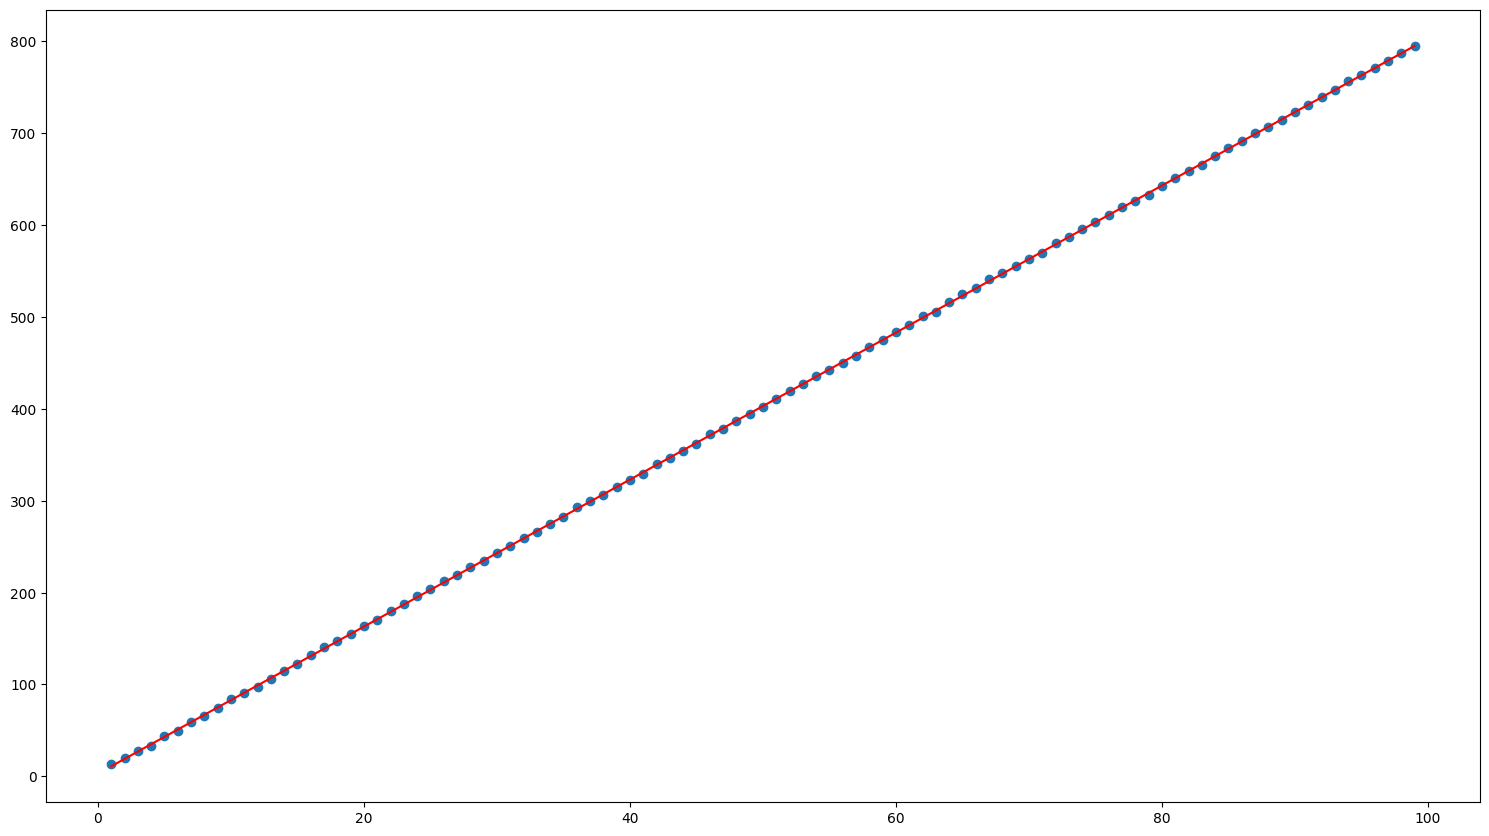

In [97]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
figure(figsize=(18.5, 10.5), dpi=100)
torch.manual_seed(42)
torch.__version__
#los tensores son arrays  rank 0 escalar, rank 1 vector, rank 2 matriz, rank 3 array de tres dimensiones.
x = torch.tensor(5.)
w = torch.tensor(4.,requires_grad=True) #pendiente
b = torch.tensor(2.,requires_grad=True) #interseccion
y = x*w + b #ecuacion de una linea
y.backward() #Y sera la variable a derivar
print(w.grad,b.grad) #derivada de y respecto a w y b
x = torch.tensor(np.arange(1,100,1))
y = x*8+3+torch.randn(len(x)) #los valores aproximados que debe dar la regresion seran 8 y 3 para este caso
#Inicializacion
w = torch.tensor(0.,requires_grad=True)
b = torch.tensor(0.,requires_grad=True)
EPOCHS = 100 
LEARNING_RATE = 0.0001
losses = []
#Funcion de perdida, error cuadrático medio
def mse(y , y_pred):
  err = y - y_pred
  return torch.mean(err ** 2)
# forward hace las estimaciones o predicciones de y
def forward(x , w , b):
  y_pred = ((x*w)+b)
  return y_pred
for i in range(EPOCHS):
  #se pasan los datos (forward) a la funcion para obtener la prediccion de y
  y_pred = forward(x , w , b)
  y_pred.reshape(-1)
 
  #Calcula perdida
  loss = mse(y, y_pred)
  losses.append(loss)
  #Se realiza backpropagation, se actualizan los pesos y se resetean los gradientes a 0
  loss.backward()
  with torch.no_grad():
    w  -= w.grad*LEARNING_RATE
    b  -= b.grad*LEARNING_RATE
  w.grad.zero_()
  b.grad.zero_()
  if i%15==0:
    print(loss)

#En rojo la ecuacion original sin ruido y en azul la aproximacion
plt.scatter(x,y)
plt.plot(x, x*8 + 3 , color='red')
print(w.item(),b.item())